## Dataset Stonia

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerias

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Abrir ficher

df = pd.read_csv('/content/drive/MyDrive/2021 II/Machine Learning/Estonia.csv')
df1 = pd.read_csv('/content/drive/MyDrive/2021 II/Machine Learning/Estonia.csv')

### Exploracion de datos

In [5]:
# Verifico las primera 5 lineas del dataset
df.head(10)

PassengerId  Country           Firstname  ... Age Category  Survived
0            1   Sweden         ARVID KALLE  ...  62        P         0
1            2  Estonia                 LEA  ...  22        C         0
2            3  Estonia                AIRI  ...  21        C         0
3            4   Sweden                JURI  ...  53        C         0
4            5   Sweden     BRITTA ELISABET  ...  55        P         0
5            6   Sweden  GERD INGA MAGNHILD  ...  71        P         0
6            7   Sweden             HJALMAR  ...  60        P         0
7            8  Estonia               PILLE  ...  18        P         0
8            9  Estonia               TORMI  ...  30        C         0
9           10   Sweden          ANNA MARIA  ...  63        P         0

[10 rows x 8 columns]

In [6]:
# Para concer las dimensiones del dataset
print(df.shape)

(989, 8)


In [7]:
# Para concer el nombre de las columnas
df.columns

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')

In [8]:
# Descripcion del dataset
df.describe()

PassengerId         Age    Survived
count   989.000000  989.000000  989.000000
mean    494.992922   44.575329    0.138524
std     285.643660   17.235146    0.345624
min       1.000000    0.000000    0.000000
25%     248.000000   30.000000    0.000000
50%     495.000000   44.000000    0.000000
75%     742.000000   59.000000    0.000000
max     989.000000   87.000000    1.000000

In [9]:
# Para concer el numero de datos faltantes en cada columna
df.isnull().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

### Exploracion

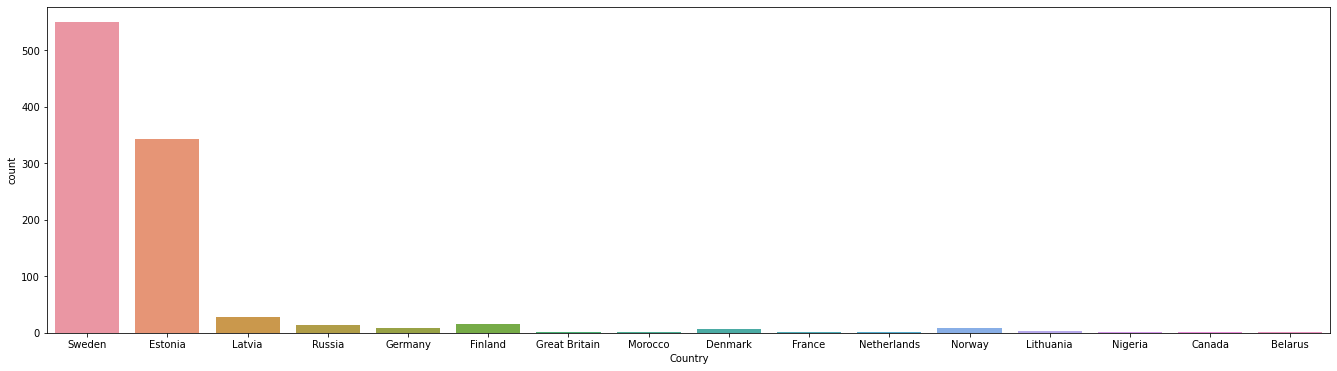

In [11]:
plt.figure(figsize=(23,6))
sns.countplot(data=df,x="Country")

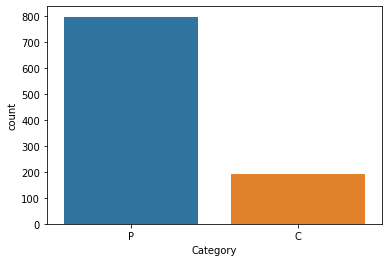

In [12]:
sns.countplot(data=df,x="Category")

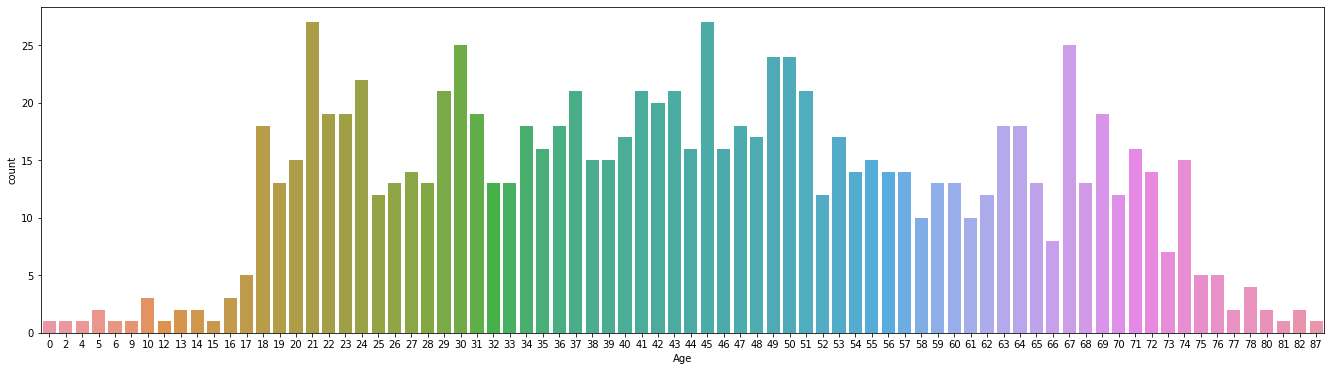

In [13]:
plt.figure(figsize=(23,6))
sns.countplot(data=df,x="Age")

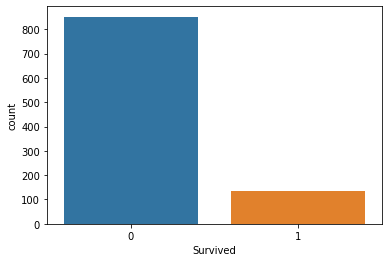

In [14]:
sns.countplot(data=df,x="Survived")

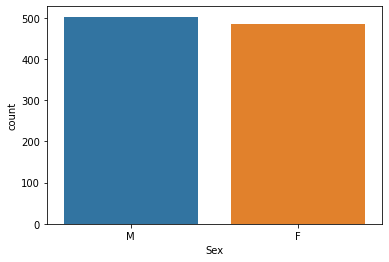

In [15]:
sns.countplot(data=df,x="Sex")

Los datos no estan balanceados

In [16]:
# Tratamiento de los datos, reemplazo
#Job: 0 - Sweden, 1 - Estonia, 2 - Latvia, 3 - Russia, 4 - Germany, 5 - Finland, 6 - Great Britain, 7 - Denmark,
#     8 - France, 9 - Netherlands, 10 - Norway, 11 - Lithuania, 12 - Nigeria, 13 - Canada, 14 - Belarus, 14 - Morocco
df.Country.replace({'Sweden':0, 'Estonia':1, 'Latvia':2, 'Russia':3, 'Germany':4, 'Finland':5, 'Great Britain':6, 'Denmark':7, 'France':8, 'Netherlands':9, 'Norway':10, 'Lithuania':11, 'Nigeria':12, 'Canada':13, 'Belarus':14, 'Morocco':15},inplace=True)

df.Category.replace({'P':0, 'C':1},inplace=True)
df.Sex.replace({'M':0, 'F':1},inplace=True)

In [17]:
# Verifico las primera 5 lineas del dataset
df.head(10)

PassengerId  Country           Firstname  ... Age  Category  Survived
0            1        0         ARVID KALLE  ...  62         0         0
1            2        1                 LEA  ...  22         1         0
2            3        1                AIRI  ...  21         1         0
3            4        0                JURI  ...  53         1         0
4            5        0     BRITTA ELISABET  ...  55         0         0
5            6        0  GERD INGA MAGNHILD  ...  71         0         0
6            7        0             HJALMAR  ...  60         0         0
7            8        1               PILLE  ...  18         0         0
8            9        1               TORMI  ...  30         1         0
9           10        0          ANNA MARIA  ...  63         0         0

[10 rows x 8 columns]

In [18]:
# Descartamos la columna: Firstname, Lastname
df = df.drop(['Firstname','Lastname'], axis=1)
df.head(10)

PassengerId  Country  Sex  Age  Category  Survived
0            1        0    0   62         0         0
1            2        1    1   22         1         0
2            3        1    1   21         1         0
3            4        0    0   53         1         0
4            5        0    1   55         0         0
5            6        0    1   71         0         0
6            7        0    0   60         0         0
7            8        1    1   18         0         0
8            9        1    0   30         1         0
9           10        0    1   63         0         0

In [19]:
# Genero datos de entrenamiento y test
X = df.drop('Survived',axis=1) # Variable independiente
y = df['Survived'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [20]:
print("Numero de datos de entrenamiento: ", len(X_train))
print("Numero de datos en test: ", len(X_test))

Numero de datos de entrenamiento:  791
Numero de datos en test:  198


In [21]:
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(random_state=0)
reg_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Realizamos la prediccion
y_pred = reg_log.predict(X_test)

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc_knn = metrics.accuracy_score(y_test,y_pred)

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc_reg_log = metrics.accuracy_score(y_test,y_pred)

In [25]:
acc_reg_log

0.8383838383838383

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[166   0]
 [ 32   0]]


## Revisamos los datos no balanceados

In [27]:
majority=df1[df1["Sex"]=="M"]
minority=df1[df1["Sex"]=="F"]

In [28]:
# Numero de yes y no, en dataset inicial
len(majority), len(minority)

(503, 486)

### Resample

In [29]:
# Aplicamos ReSample
from sklearn.utils import resample

In [30]:
minority_upsampled = resample(minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15000,    # to match majority class
                                 random_state=123) # reproducible results

In [31]:
data_upsampled=pd.concat([majority,minority_upsampled])

In [ ]:
#data_upsampled=pd.concat([majority,minority_upsampled])

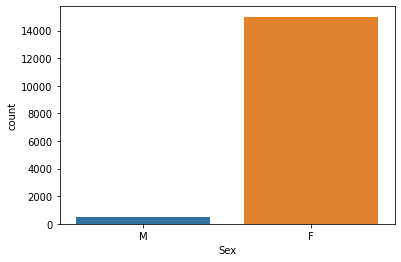

In [32]:
sns.countplot(data=data_upsampled,x="Sex")

In [33]:
# Numero de yes y no, luego de balanceo
len(data_upsampled), len(minority_upsampled)

(15503, 15000)

In [34]:
# Tratamiento de los datos, reemplazo
#Job: 0 - Sweden, 1 - Estonia, 2 - Latvia, 3 - Russia, 4 - Germany, 5 - Finland, 6 - Great Britain, 7 - Denmark,
#     8 - France, 9 - Netherlands, 10 - Norway, 11 - Lithuania, 12 - Nigeria, 13 - Canada, 14 - Belarus, 14 - Morocco
df1.Country.replace({'Sweden':0, 'Estonia':1, 'Latvia':2, 'Russia':3, 'Germany':4, 'Finland':5, 'Great Britain':6, 'Denmark':7, 'France':8, 'Netherlands':9, 'Norway':10, 'Lithuania':11, 'Nigeria':12, 'Canada':13, 'Belarus':14, 'Morocco':15},inplace=True)

df1.Category.replace({'P':0, 'C':1},inplace=True)
df1.Sex.replace({'M':0, 'F':1},inplace=True)

In [40]:
# Descartamos la columna: Firstname, Lastname
df1 = df1.drop(['Firstname','Lastname'], axis=1)
df1.head(10)

PassengerId  Country  Sex  Age  Category  Survived
0            1        0    0   62         0         0
1            2        1    1   22         1         0
2            3        1    1   21         1         0
3            4        0    0   53         1         0
4            5        0    1   55         0         0
5            6        0    1   71         0         0
6            7        0    0   60         0         0
7            8        1    1   18         0         0
8            9        1    0   30         1         0
9           10        0    1   63         0         0

In [41]:
# Genero datos de entrenamiento y test
X1 = df1.drop('Sex',axis=1) # Variable independiente
y1 = df1['Sex'] # Variable dependiente

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=23)

In [42]:
print("Numero de datos de entrenamiento: ", len(X_train1))
print("Numero de datos en test: ", len(X_test1))

Numero de datos de entrenamiento:  791
Numero de datos en test:  198


In [43]:
from sklearn.linear_model import LogisticRegression

reg_log1 = LogisticRegression(random_state=0)
reg_log1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Realizamos la prediccion
y_pred1 = reg_log1.predict(X_test1)

In [45]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc_reg_log1 = metrics.accuracy_score(y_test1,y_pred1)

In [46]:
acc_reg_log1

0.6818181818181818

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test1,y_pred1))

[[58 49]
 [14 77]]


### Trabajo
1. Que puede proponer para mejorar el accuracy en el notebook
2. Utilizando el dataset estonia, replique el proceso de Regresion logistica y calcule el accuracy. 

Acuracy 1 = 0.8383838383838383

Acuracy 2 = 0.6818181818181818 